## 1変数の回帰モデル
**値が線形的にとる時に有効**

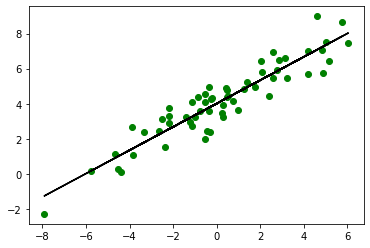

In [6]:
import numpy as np
from sklearn import linear_model
import sklearn.metrics as sm
import matplotlib.pyplot as plt
%matplotlib inline

# ファイルを読み込む
input_file = './data/data_singlevar_regr.txt'

# ファイルを読み込んで,カンマ区切りで分ける
data = np.loadtxt(input_file, delimiter=',')
# Xには最後の列以外、yには最後の列だけ入れる
X, y = data[:, :-1], data[:, -1]

# 線形回帰モデルを作成してX,yを元に訓練する
regressor = linear_model.LinearRegression()
regressor.fit(X, y)

# Xを元に予測する
y_pred = regressor.predict(X)

# 出力を予測する
plt.scatter(X, y, color='green')
plt.plot(X, y_pred, color='black')

# グラフを表示する
plt.show()

### 線形回帰で求めた直線と実際の値yとがどの程度離れているか計算する

### 線形回帰モデルの性能
- Mean absolute error: 絶対値誤差の平均
- Mean squared error: 二乗誤差の平均
- Medium absolute error: 絶対値誤差の中央値
- Explain variance error: 因子の寄与率
- R2 score: R2スコア

In [10]:
print("線形回帰モデルの性能")
print("Mean absolute error = ", round(sm.mean_absolute_error(y, y_pred), 2))
print("Mean squared error = ", round(sm.mean_squared_error(y, y_pred), 2))
print("Medium absolute error = ", round(sm.median_absolute_error(y, y_pred), 2))
print("Explain variance error = ", round(sm.explained_variance_score(y, y_pred), 2))
print("R2 score = ", round(sm.r2_score(y, y_pred), 2))

線形回帰モデルの性能
Mean absolute error =  0.65
Mean squared error =  0.62
Medium absolute error =  0.56
Explain variance error =  0.86
R2 score =  0.86


In [13]:
import pickle

# 訓練済みモデルを保存
output_model_file = 'model.pkl'
with open(output_model_file, 'wb') as f:
    pickle.dump(regressor, f)

# 訓練済みモデルを読み込む
with open(output_model_file, 'rb') as f:
    regressor_model = pickle.load(f)

# 読み込んだモデルを使ってもう一度予測してみる
y_pred_new = regressor_model.predict(X)

# 再度絶対値誤差を求めてあってるか確認する
print("\nNew mean absolute error =", round(sm.mean_absolute_error(y, y_pred_new), 2))


New mean absolute error = 0.65
